<font size="6">IMPORTING</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy

import glob

In [2]:
users = pd.read_csv('fatal_motor.csv')

#ALCOHOL
try:
    # Read the CSV file
    alc = pd.read_csv('alc-sev.csv', encoding='utf-16', delimiter='\t')
except pd.errors.ParserError as e:
    print("Warning: Some lines were skipped due to parsing errors.")
    print(e)
    
    
#DAY
try:
    # Read the CSV file
    day_of = pd.read_csv('day-sev.csv', encoding='utf-16', delimiter='\t')
except pd.errors.ParserError as e:
    print("Warning: Some lines were skipped due to parsing errors.")
    print(e)
 

#AGES
try:
    # Read the CSV file
    mid_age = pd.read_csv('65To75.csv', encoding='utf-16', delimiter='\t')
except pd.errors.ParserError as e:
    print("Warning: Some lines were skipped due to parsing errors.")
    print(e)
    
try:
    # Read the CSV file
    old_age = pd.read_csv('75UP.csv', encoding='utf-16', delimiter='\t')
except pd.errors.ParserError as e:
    print("Warning: Some lines were skipped due to parsing errors.")
    print(e)
    
try:
    # Read the CSV file
    teen_age = pd.read_csv('TeenCrash.csv', encoding='utf-16', delimiter='\t')
except pd.errors.ParserError as e:
    print("Warning: Some lines were skipped due to parsing errors.")
    print(e)

    
#GENDER AND AGE
try:
    # Read the CSV file
    gen_age = pd.read_csv('GenAge.csv', encoding='utf-16', delimiter='\t')
except pd.errors.ParserError as e:
    print("Warning: Some lines were skipped due to parsing errors.")
    print(e)

In [3]:
#alc.head()
#users.head()
#day_of.head()
#mid_age.head()
#old_age.head()
#teen_age.head()
#gen_age.head()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(day_of)

           Day  N/A Disabling Injury(A) Evident Injury(B) Fatal(K)  \
0       Sunday   17               1,434             7,876      614   
1       Monday   22               1,223             8,224      616   
2      Tuesday    7               1,436             8,053      474   
3    Wednesday   14               1,363             8,302      507   
4     Thursday   42               1,327             8,239      632   
5       Friday   49               1,720            10,340      700   
6     Saturday   21               1,899             9,516      715   
7  Grand Total  172              10,402            60,550    4,258   

  No Injury(O) Possible Injury(C) Unknown Grand Total  
0       60,134             14,209   6,476      90,760  
1       84,821             18,672   5,660     119,238  
2       87,331             19,999   5,194     122,494  
3       88,987             19,861   5,465     124,499  
4       89,042             19,736   5,420     124,438  
5      105,702             24,286

In [4]:
old_age = pd.DataFrame({
    'Disabling Injury(A)': [2, 60],
    'Evident Injury(B)': [192, 4214],
    'Fatal(K)': [1442, 22494],
    'No Injury(O)': [141, 1557],
    'Possible Injury(C)': [14198, 245715],
    'Unknown': [2746, 46638],
    'Grand Total': [137, 23728]
}, index=['Person (>75) Involved', 'Person (>75) Not Involved'])

day_of = pd.DataFrame({
    'Disabling Injury(A)': [17, 22, 7, 14, 42, 49, 21],
    'Evident Injury(B)': [1434, 1223, 1436, 1363, 1327, 1720, 1899],
    'Fatal(K)': [7876, 8224, 8053, 8302, 8239, 10340, 9516],
    'No Injury(O)': [614, 616, 474, 507, 632, 700, 715],
    'Possible Injury(C)': [60134, 84821, 87331, 88987, 89042, 105702, 81953],
    'Unknown': [14209, 18672, 19999, 19861, 19736, 24286, 19464],
    'Grand Total': [6476, 5660, 5194, 5465, 5420, 6341, 6558]
}, index=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

old_age.reset_index(inplace=True)
day_of.reset_index(inplace=True)

# Merge the two DataFrames on similar columns
oldDay = pd.merge(old_age, day_of, on=old_age.columns.tolist(), how='outer')
oldDay.set_index('index', inplace=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(oldDay)

                           Disabling Injury(A)  Evident Injury(B)  Fatal(K)  \
index                                                                         
Person (>75) Involved                        2                192      1442   
Person (>75) Not Involved                   60               4214     22494   
Sunday                                      17               1434      7876   
Monday                                      22               1223      8224   
Tuesday                                      7               1436      8053   
Wednesday                                   14               1363      8302   
Thursday                                    42               1327      8239   
Friday                                      49               1720     10340   
Saturday                                    21               1899      9516   

                           No Injury(O)  Possible Injury(C)  Unknown  \
index                                                     

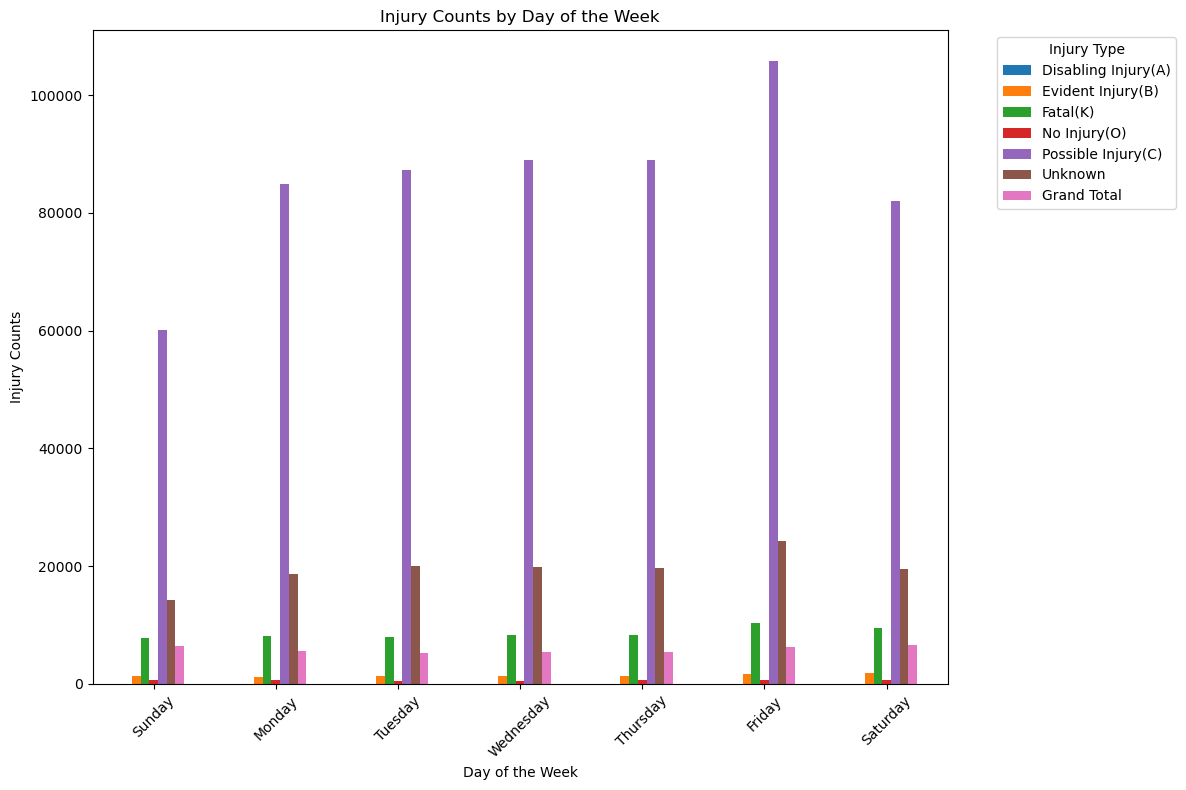

In [5]:
#Days of the Week Bar Plot

day_of.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plotting
day_of.plot(kind='bar', figsize=(12, 8))
plt.title('Injury Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Injury Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

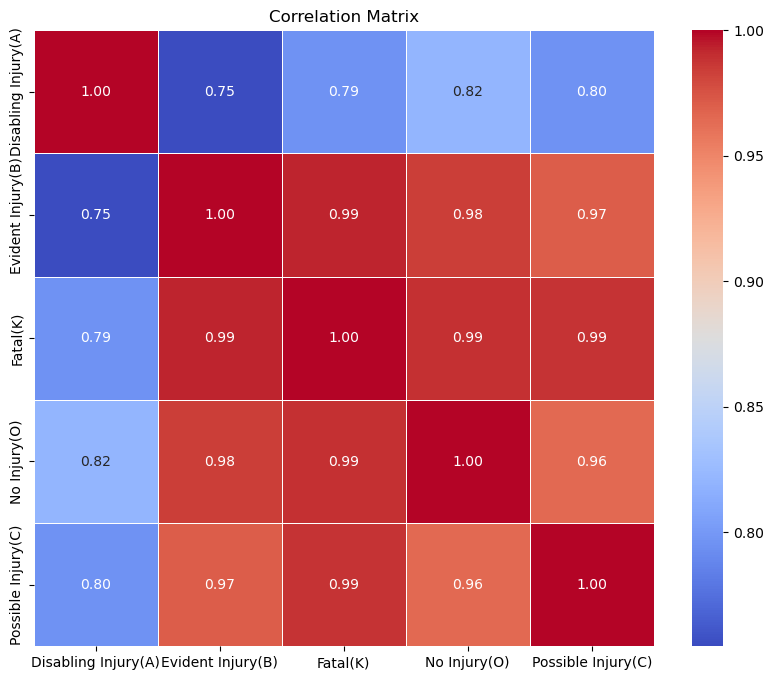

Index(['Disabling Injury(A)', 'Evident Injury(B)', 'Fatal(K)', 'No Injury(O)',
       'Possible Injury(C)', 'Unknown', 'Grand Total'],
      dtype='object')


In [6]:
oldDayFiltered = oldDay.drop(columns=['Grand Total', 'Unknown'])

corr_matrix = oldDayFiltered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

print(oldDay.columns)